In [2]:
import pandas as pd

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load local CSV file into DataFrame
df = pd.read_csv('customer_purchases.csv')
df.head()

,Age,Estimated_Salary,Previous_Purchases,Purchased
0,25,55000,2,0
1,35,75000,5,1
2,42,60000,1,0
3,28,80000,8,1
4,55,120000,10,1


In [6]:
#Handling Missing Values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age                   0
Estimated_Salary      0
Previous_Purchases    0
Purchased             0
dtype: int64


In [7]:
#define the X and Y --> define the features and the target
X = df[['Age', 'Estimated_Salary', 'Previous_Purchases']]
y = df['Purchased']

In [8]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (24, 3)
Testing shape: (6, 3)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 scaled training samples:\n", X_train_scaled[:5])

First 5 scaled training samples:
 [[ 1.13345292  1.06445833  1.48110085]
 [-1.28872045 -1.55851072 -1.50371307]
 [ 0.76081087  0.95666508  0.93840741]
 [-1.10239942 -0.83988906 -0.96101963]
 [ 1.69241601  1.49563133  1.20975413]]


In [10]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [11]:
log_reg.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [12]:
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [13]:
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-Score :", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Confusion Matrix (LogReg):
 [[3 0]
 [0 3]]


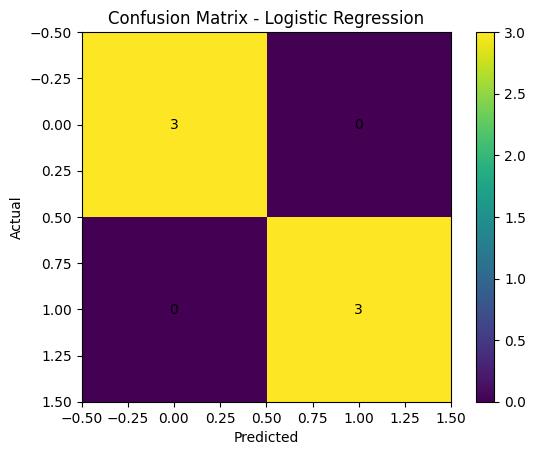

In [14]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (LogReg):\n", cm_lr)

# Plot (use matplotlib only; one chart per figure; no custom colors)
plt.figure()
plt.imshow(cm_lr, interpolation='nearest')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm_lr):
    plt.text(j, i, str(val), ha='center', va='center')
plt.colorbar()
plt.show()

In [15]:
#model deployment

import numpy as np

def predict_purchase(age: float, estimated_salary: float, previous_purchases: float, threshold: float = 0.5):


    X_new = np.array([[age, estimated_salary, previous_purchases]], dtype=float)
    X_new_scaled = scaler.transform(X_new)

    pred = log_reg.predict(X_new_scaled)[0]
    proba = log_reg.predict_proba(X_new_scaled)[0][1]

    return {"probability_purchase": proba, "prediction": pred}

# Example quick test

In [16]:
predict_purchase(0, 70000, 6)

C:\Users\Kasun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'probability_purchase': np.float64(0.18741624960937667),
 'prediction': np.int64(0)}